In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import scipy.spatial.distance as dist
from scipy.fftpack import fft, fftfreq
%matplotlib inline

In [2]:
def dis_NN(m): 
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(m[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(m[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [3]:
def dis_MN(m,n):
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(n[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(n[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [4]:
def Histo_dist (Dist,bins_0):
    frec, b = np.histogram(Dist, bins = bins_0)
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

In [5]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = (Nr*(Nr-1))/(Nd*(Nd-1))
    return ((np.divide(DD,RR))*n) -1

In [6]:
def Dav_Pee(DD,DR,Nd,Nr):
    n = (Nr)/(Nd-1)  
    return ((np.divide(DD,DR))*(n)) - 1

In [7]:
def Hamilton(DD,RR,DR,Nd,Nr):
    n = 4* Nd * Nr / ((Nd-1)*(Nr-1))
    return np.divide(DD*RR,np.power(DR,2)) -1 

In [8]:
def Lan_Sza(DD,RR,DR,Nd,Nr):
    n_1 = (Nr*(Nr-1))/(Nd*(Nd-1))
    n_2 = (Nr-1)/(Nd)
    return  1 + ((np.divide(DD,RR))*n_1) - 2*((np.divide(DR,RR))*n_2)

In [11]:
def anillo_random(rad_ex,rad_in,puntos):  #Depende del radio esterior y interior, ademas de la cantidad de puntos dentro de él.
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

In [67]:
anillo = anillo_random(30,27,1000) # Anillo de radio interno n y radio externo m con p puntos

In [68]:
dis_anillo = dis_NN(anillo)

In [69]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [70]:
dimencion = 100
puntos = len(anillo)*5
R_anillo = caja_Rand(dimencion,puntos) #hacemos la caja

In [71]:
dis_R_anillo = dis_NN(R_anillo) 

In [72]:
dis_DR_anillo= dis_MN(anillo,R_anillo)

ANILLO

<Figure size 432x288 with 0 Axes>

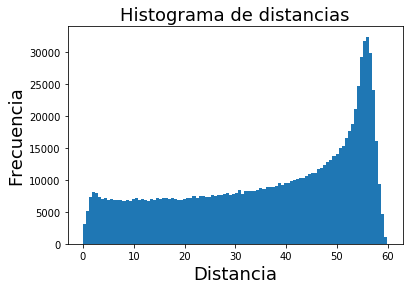

In [112]:
binn =100
DD_anillo, bins_D_anillo = Histo_dist(dis_anillo,binn)

<Figure size 432x288 with 0 Axes>

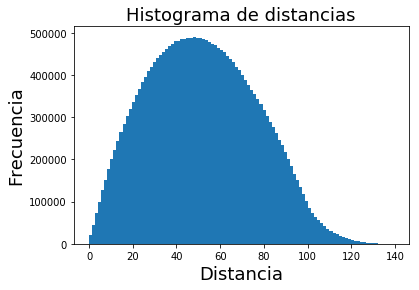

In [113]:
RR_anillo, bins_R_anillo = Histo_dist(dis_R_anillo,binn)

<Figure size 432x288 with 0 Axes>

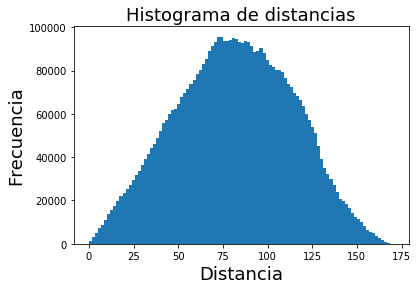

In [114]:
DR_anillo, bins_DR_anillo = Histo_dist(dis_DR_anillo,binn)

In [115]:
LS_anillo = Lan_Sza(DD_anillo,RR_anillo,DR_anillo,len(anillo),len(R_anillo))

No handles with labels found to put in legend.


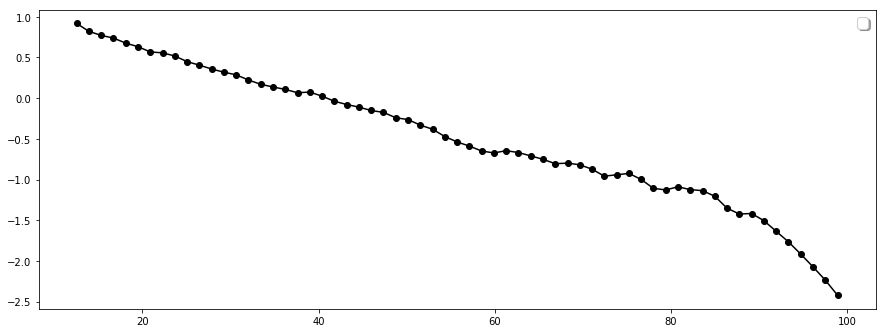

In [117]:
l_0 = 9
l_1 = 28
plt.figure(figsize=(15,5.5))
#plt.plot(bins_R_anillo[:-1],PH_anillo,'o-',label='Peebles-Hauser')
#plt.plot(bins_R_anillo[:-1],DP_anillo,'o-',label='Davis-Peebles')
#plt.plot(bins_R_anillo[:-1],HM_anillo,'o-',label='Hamilton')
plt.plot(bins_R_anillo[l_0:-(l_1+1)],LS_anillo[l_0:-l_1],'ko-')
plt.legend(shadow=True, fontsize='x-large')
#plt.ylim(-3,2)
#plt.xlim(-2,150)

### Espectro de potencias

\begin{equation}
\hat{P}(k) = V \frac{1}{N} \sum_{i=gal}^{N} e^{-ik\dot x} - \frac{V}{N}
\end{equation}

Definimos la ecuación anterior como una función:

In [118]:
def fourire(x_n, L ,dim):
    j = complex(0,1)
    N = len(x_n) 
    k_n = x_n
    P_k = []
    for i in range(N): 
         P_k.append( (L**dim)*pow(abs(np.sum(np.exp(-j*(k_n[i]*x_n)))/N),2) - (L**dim/N))
    return P_k

#### Anillo

In [119]:
P_anillo_4 = fourire(LS_anillo[l_0:-l_1],50,1)

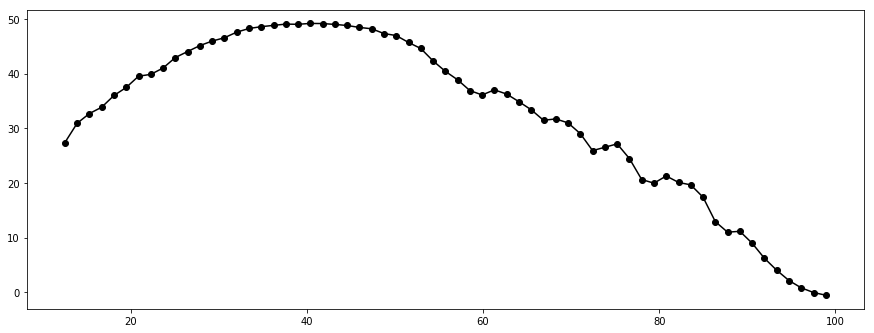

In [125]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_anillo[l_0:-(l_1+1)],P_anillo_4,'ko-')